In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
df=pd.read_csv('House_Rent_Dataset.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [3]:
# df.shape
df.columns
# df.describe()

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [4]:
# plt.figure(figsize=(20,8))

# sns.barplot(x=df["City"],y=df["Rent"])

In [5]:
df.head(20)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [6]:
print(f"Ortalama deger: {round(df["Rent"].mean())}")
print(f"Maximum deger: {round(df["Rent"].max())}")
print(f"Minimum deger: {round(df["Rent"].min())}")
print(f"Medyan deger: {round(df["Rent"].median())}")

Ortalama deger: 34993
Maximum deger: 3500000
Minimum deger: 1200
Medyan deger: 16000


              Rent       BHK      Size  Bathroom
Rent      1.000000  0.369718  0.413551  0.441215
BHK       0.369718  1.000000  0.716145  0.794885
Size      0.413551  0.716145  1.000000  0.740703
Bathroom  0.441215  0.794885  0.740703  1.000000


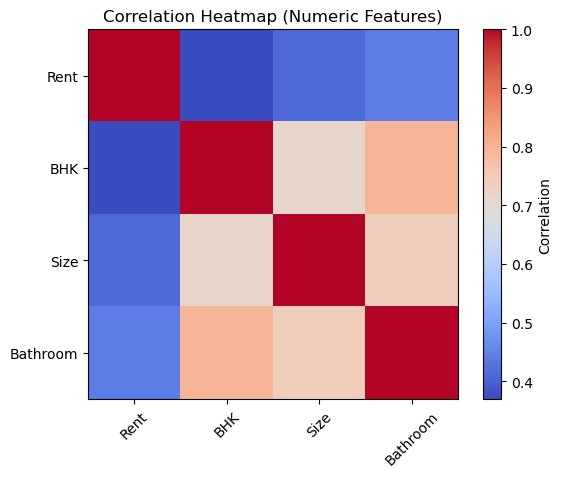

In [7]:

numeric_cols = ["Rent", "BHK", "Size", "Bathroom"]
corr = df[numeric_cols].corr()

print(corr)

plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [8]:
#AVG RENT
def averageRent(e:str):
    avg_rent=round(df.groupby(e)['Rent'].mean().sort_values())
    print(avg_rent)
averageRent("BHK")    
# plt.figure(figsize=(10,8))
# avg_rent.plot(kind="bar")
# plt.ylabel("Average Rent")
# plt.title("Average Rent by City")
# plt.show()

BHK
1     14139.0
2     22114.0
3     55863.0
6     73125.0
4    168865.0
5    297500.0
Name: Rent, dtype: float64


In [9]:
BHK = df.BHK.value_counts(normalize=True).reset_index()
BHK['BHK %'] = BHK['proportion'] * 100
BHK.drop(['proportion'], axis=1)

,BHK,BHK %
0,2,47.724399
1,1,24.589128
2,3,23.135272
3,4,3.982301
4,5,0.400337
5,6,0.168563


In [10]:
def groupByFeatures(e:str):
    return df.groupby(e).describe()["Rent"]
groupByFeatures("Point of Contact")    

,count,mean,std,min,25%,50%,75%,max
Point of Contact,,,,,,,,
Contact Agent,1529.0,73481.158927,125732.206670,5000.0,24000.0,45000.0,80000.0,3500000.0
Contact Builder,1.0,5500.000000,NaN,5500.0,5500.0,5500.0,5500.0,5500.0
Contact Owner,3216.0,16704.206468,21239.629404,1200.0,8500.0,12500.0,18000.0,600000.0


In [11]:
def countFeatures(e:str):
    return df[e].value_counts()
countFeatures("Furnishing Status")


Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [12]:
#en cok etkileyen 1-city Mumbai aykiri max
#2-BHK 5 no
#3-Size normal artis
#4

/tmp/ipykernel_2989/2857046944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[e].head(25),y=df[a].head(500),palette="tab10")


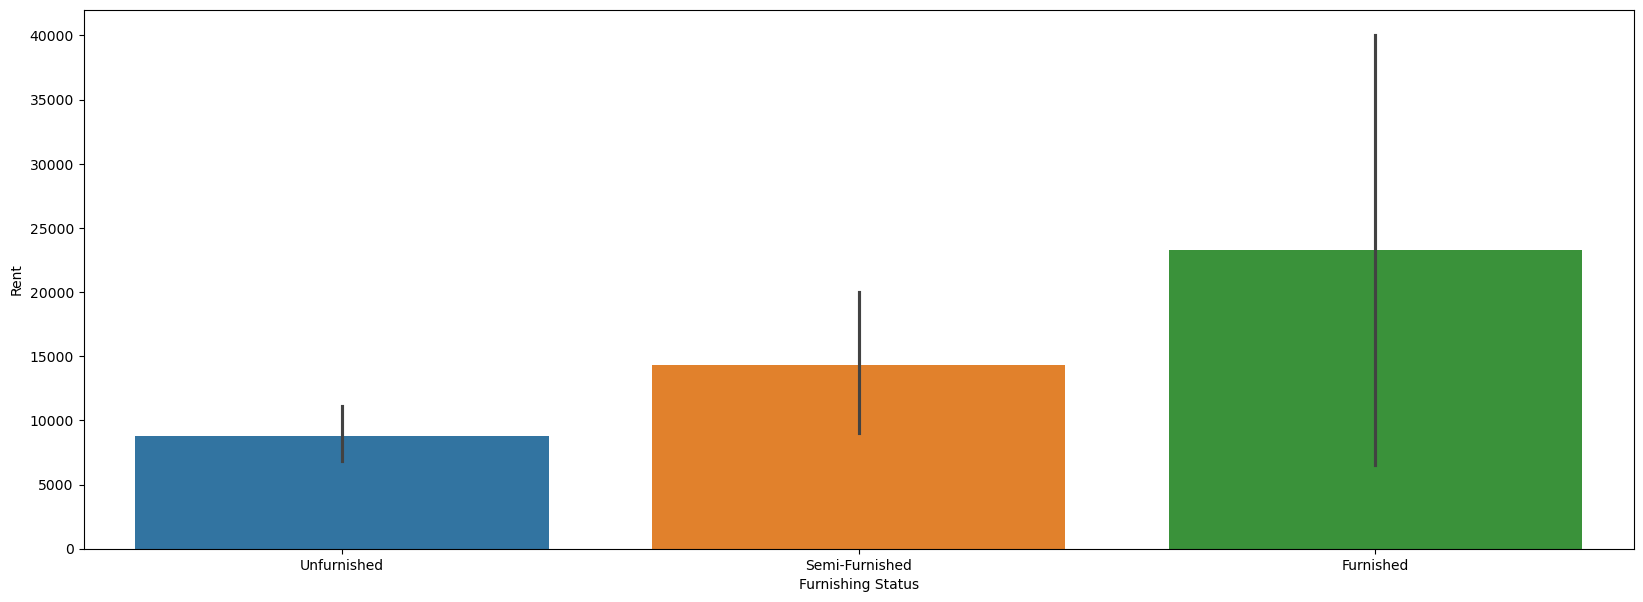

In [13]:
def histogramRent(e:str,a:str="Rent"):
    plt.figure(figsize=(20,7))
    sns.barplot(x=df[e].head(25),y=df[a].head(500),palette="tab10")
histogramRent("Furnishing Status")

In [14]:
def catchones(col:str):
    x=df.groupby(col)\
        .agg(Count=("Furnishing Status", "count"))\
        .assign(Proportion=lambda x: x["Count"] / x["Count"].sum() * 100)\
        .sort_values(by=['Count'], ascending=True)\
        .reset_index()
    ones = x[x["Count"] == 1][[col, "Count"]].to_dict("records")

    return ones
catchones("Floor")


[{'Floor': '25 out of 42', 'Count': 1},
 {'Floor': '44 out of 75', 'Count': 1},
 {'Floor': '43 out of 78', 'Count': 1},
 {'Floor': '19 out of 21', 'Count': 1},
 {'Floor': '19 out of 22', 'Count': 1},
 {'Floor': '19 out of 24', 'Count': 1},
 {'Floor': '19 out of 25', 'Count': 1},
 {'Floor': '19 out of 26', 'Count': 1},
 {'Floor': '19 out of 27', 'Count': 1},
 {'Floor': '41 out of 41', 'Count': 1},
 {'Floor': '19 out of 31', 'Count': 1},
 {'Floor': '19 out of 33', 'Count': 1},
 {'Floor': '19 out of 38', 'Count': 1},
 {'Floor': '19 out of 85', 'Count': 1},
 {'Floor': '2 out of 1', 'Count': 1},
 {'Floor': '40 out of 75', 'Count': 1},
 {'Floor': '2 out of 11', 'Count': 1},
 {'Floor': '40 out of 50', 'Count': 1},
 {'Floor': '4 out of 58', 'Count': 1},
 {'Floor': '4 out of 31', 'Count': 1},
 {'Floor': '4 out of 30', 'Count': 1},
 {'Floor': '2 out of 17', 'Count': 1},
 {'Floor': '4 out of 27', 'Count': 1},
 {'Floor': '2 out of 22', 'Count': 1},
 {'Floor': '2 out of 24', 'Count': 1},
 {'Floor':

In [15]:
def categorize_floor(val):
    if "Upper Basement" in val:
        return "upper_basement"
    elif "Lower Basement" in val:
        return "lower_basement"
    elif "Ground" in val:
        return "ground"
    elif "out of" in val:
        return "normal"
    else:
        return val

def building_floor(val):
    nums = re.findall(r"\d+", val)
    if "Upper Basement" in val:
        return nums[0] if nums else np.nan
    elif "Lower Basement" in val:
        return nums[0] if nums else np.nan
    elif "Ground" in val:
        return nums[0] if nums else np.nan
    elif "out of" in val:
        return nums[1] if nums else np.nan
    else:
        return val

def flat_floor(val):
    nums = re.findall(r"\d+", val)
    if "Upper Basement" in val:
        return -1
    elif "Lower Basement" in val:
        return -1
    elif "Ground" in val:
        return 0
    elif "out of" in val:
        return int(nums[0]) if nums else np.nan
    else:
        return val
categorize_floor("Floor")

'Floor'

In [16]:
df["Floor"]

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object

In [17]:
df['Categorized Floor'] = df["Floor"].apply(categorize_floor)
df['Building Floor'] = df["Floor"].apply(building_floor)
df['Flat Floor'] = df["Floor"].apply(flat_floor)

In [18]:
from sklearn.preprocessing import LabelEncoder
cols=['BHK', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
        'Point of Contact','Categorized Floor']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head(15)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Categorized Floor,Building Floor,Flat Floor
0,2022-05-18,1,10000,1100,455,2,221,4,2,1,2,2,2,2,0
1,2022-05-13,1,20000,800,14,2,1527,4,1,1,1,2,4,3,1
2,2022-05-16,1,17000,1000,14,2,1760,4,1,1,1,2,4,3,1
3,2022-07-04,1,10000,800,10,2,526,4,2,1,1,2,4,2,1
4,2022-05-09,1,7500,850,10,1,1890,4,2,0,1,2,4,2,1
5,2022-04-29,1,7000,600,447,2,1975,4,2,1,2,2,2,1,0
6,2022-06-21,1,10000,700,458,2,1184,4,2,0,2,0,2,4,0
7,2022-06-21,0,5000,250,10,2,1184,4,2,0,1,0,4,2,1
8,2022-06-07,1,26000,800,10,1,1476,4,2,0,2,0,4,2,1
9,2022-06-20,1,10000,1000,14,1,1358,4,1,1,2,2,4,3,1


In [19]:
# df['Categorized Floor'] = df["Floor"].apply(categorize_floor)
# df['Building Floor'] = df["Floor"].apply(building_floor)
# df['Flat Floor'] = df["Floor"].apply(flat_floor)
# df.head(30)

In [20]:
(df["Furnishing Status"]==df["Furnishing Status"].iloc[1]).sum()

np.int64(2251)

In [21]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.utils import resample  # Doğru import


In [22]:
# pip install imbalanced-learn
# smote=SMOTE(sampling_strategy="auto",random_state=43)
# x_res,y_res=smote.fit_resample(df["Rent"],df[""])
# print(f"SMOTE sonrasi: ",Counter(y_res))
# df_resampled=pd.DataFrame(x_res)


In [23]:

def balance_cities(df, target_samples=700):
    balanced_dfs = []
    
    for city in df['City'].unique():
        city_data = df[df['City'] == city]
        
        if len(city_data) < target_samples:
            # Oversample
            city_resampled = resample(
                city_data, 
                n_samples=target_samples, 
                replace=True,
                random_state=42
            )
        else:
            # Undersample
            city_resampled = resample(
                city_data,
                n_samples=target_samples,
                replace=False,
                random_state=42
            )
        
        balanced_dfs.append(city_resampled)
    
    return pd.concat(balanced_dfs, ignore_index=True)

In [24]:
x=balance_cities(df,300)
x

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Categorized Floor,Building Floor,Flat Floor
0,2022-06-30,0,7000,350,455,1,1762,4,2,1,1,0,2,2,0
1,2022-05-13,1,6500,550,447,2,900,4,2,1,1,0,2,1,0
2,2022-06-21,1,10000,700,458,2,1184,4,2,0,2,0,2,4,0
3,2022-06-04,1,12000,1800,1,1,312,4,2,0,2,2,4,1,1
4,2022-05-03,1,6500,700,455,2,1887,4,2,0,1,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2022-05-06,1,15000,1200,196,2,1665,3,2,0,2,2,4,3,2
1796,2022-05-12,1,10000,1300,198,2,1733,3,2,1,2,2,4,4,2
1797,2022-06-18,1,9500,900,10,2,1519,3,2,1,2,2,4,2,1
1798,2022-06-29,1,18500,920,271,1,1337,3,1,2,2,2,4,5,3


In [25]:
from sklearn.utils import resample
import pandas as pd

def balance_multiple_features(df, features_dict, random_state=42):
    """
    features_dict örnek: 
    {
        'City': 650,
        'BHK': 500, 
        'Floor': 400,
        'Area Type': 300
    }
    """
    result_df = df.copy()
    
    for feature, target_samples in features_dict.items():
        print(f"\n{feature} dengeleniyor...")
        print(f"Önceki dağılım:\n{result_df[feature].value_counts()}")
        
        balanced_dfs = []
        
        for value in result_df[feature].unique():
            feature_data = result_df[result_df[feature] == value]
            
            if len(feature_data) < target_samples:
                # Oversample
                resampled = resample(
                    feature_data,
                    n_samples=target_samples,
                    replace=True,
                    random_state=random_state
                )
            else:
                # Undersample  
                resampled = resample(
                    feature_data,
                    n_samples=target_samples,
                    replace=False,
                    random_state=random_state
                )
            
            balanced_dfs.append(resampled)
        
        result_df = pd.concat(balanced_dfs, ignore_index=True)
        print(f"Sonraki dağılım:\n{result_df[feature].value_counts()}")
    
    return result_df

# Kullanım
features_to_balance = {
    'City': 650,
    'BHK': 600,
    'Floor': 500,
    'Area Type': 350,
    'Categorized Floor':400
}

balanced_df = balance_multiple_features(df, features_to_balance)


City dengeleniyor...
Önceki dağılım:
City
5    972
1    891
0    886
3    868
2    605
4    524
Name: count, dtype: int64
Sonraki dağılım:
City
4    650
5    650
0    650
2    650
1    650
3    650
Name: count, dtype: int64

BHK dengeleniyor...
Önceki dağılım:
BHK
1    1884
0     934
2     893
3     167
4      16
5       6
Name: count, dtype: int64
Sonraki dağılım:
BHK
2    600
1    600
0    600
3    600
4    600
5    600
Name: count, dtype: int64

Floor dengeleniyor...
Önceki dağılım:
Floor
455    419
447    418
10     294
14     237
196    182
      ... 
214      1
95       1
7        1
375      1
241      1
Name: count, Length: 288, dtype: int64
Sonraki dağılım:
Floor
401    500
270    500
343    500
141    500
150    500
      ... 
75     500
112    500
176    500
363    500
120    500
Name: count, Length: 288, dtype: int64

Area Type dengeleniyor...
Önceki dağılım:
Area Type
1    113160
2     30747
0        93
Name: count, dtype: int64
Sonraki dağılım:
Area Type
1    350
2    350

In [26]:



y=balanced_df["Rent"]
x=balanced_df.drop(columns=["Rent","Posted On","Building Floor"])
x.isnull().sum()
# x=x.fillna(x.median())
# y = y.astype(int)   # if your labels are 0/1 but stored as floats
# x=x.astype(int)


BHK                  0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Categorized Floor    0
Flat Floor           0
dtype: int64

In [27]:
for i in range(len(y)):
    if y[i]==None:
        print(y[i])

In [28]:
x.head(10)

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Categorized Floor,Flat Floor
0,1,750,360,1,1447,5,1,1,2,0,4,6
1,0,500,347,0,1810,3,2,1,1,2,4,5
2,2,1950,267,1,1033,0,1,1,3,0,4,3
3,0,575,90,2,948,5,2,1,1,2,4,14
4,3,1400,35,1,33,5,1,1,3,0,4,10
5,0,500,347,0,1810,3,2,1,1,2,4,5
6,0,500,347,0,1810,3,2,1,1,2,4,5
7,0,520,372,2,2116,5,1,1,2,2,4,6
8,0,500,347,0,1810,3,2,1,1,2,4,5
9,3,1400,35,1,33,5,1,1,3,0,4,10


In [30]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


In [31]:
x_s=scaler.fit_transform(x)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [41]:
models={
        "Logistic Regresyon": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC()
}

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)  # modeli eğit


y_pred = model.predict(X_test)
for i in range(2):
    print(f"Predict:{y_pred}, Test {y_test}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}" )

Predict:[ 30000  31000 100000  30000   8000  20000  20000 230000   6500  30000
   6500  15500  15500  15000   6200   6000  52000   8000   6000   8000
  20000   6500  15000  31000  45000   8000  15500  20000  45002  18000
  36000   6000   8000  20000  35000 310000 230000  37000  18000  45000
   6500   6200  20000   6000  20000  20000 300000   6000   6500 310000
 400000 310000 310000  65000  20000  20000  40000  30000  13000  22500
   6000   6000  20000 310000  55000 250000   7500  15500 100000  30000
  20000  37000  15000 310000 120000 310000  15000 310000  20000  20000
  15000   8000  20000  19000  20000  20000  65000   6500  20000  37000
  15500   6500  20000 300000   6500  21000  30000   6000   8000 310000
   6000  15500   6000   8000   8000   6000   6000  65000  30000  15500
  20000  55000 310000 400000 100000  15500   4000   6000  45002  18000
  15500  15000  30000  13000  20000  60000  31000  37000   8000   6000
   6500  15000 400000 310000  22500  30000  20000  20000  37000   800